## pyKNEEr

# Morphology of Femoral Knee Cartilage

We measure:  
- Cartilage thickness
- Cartilage volume

## Import packages

In [1]:
import autoreload
%load_ext autoreload 
%autoreload 2

In [2]:
import pykneer_io        as io
import morphology_for_nb as morph
%matplotlib inline

## Image information

Inputs:   
- `inputFileName` is the file name of the `.txt` file containing the image list  
- `nOfCores` is the number of cores used for computations (computations are parallelized for speed)

In [3]:
inputFileName = "/Users/sbonaretti/Dropbox/Work/projects/pykneer/code/python/pykneer/scriptsForSherlock_andLocal/morphology/image_list_morphology_OAI1_DESS.txt"
nOfCores      = 4

#### Reading image data
- `imageData` is a dictionary (or struct), where each cell corresponds to an image. For each image, information such as paths and file names are stored  

In [4]:
imageData = io.load_image_data_morphology(inputFileName)

-> image information loaded


## Cartilage Thickness

We calculate cartilage thickness as the distance of the points of the subcondral bone surface to the closest points of the articular surface

### Separating subcondral surface and articular surface of cartilage

To calculate cartilage thickness, first we extract the whole cartilage surface from the binary mask. Then we separate subcondral surface and articular surface of the cartilage

In [5]:
morph.separate_cartilage_surfaces(imageData,nOfCores)

YR04_01_DESS_prep_fc.mha
YR04_05_DESS_prep_fc.mha
YR04_03_DESS_prep_fc.mha
YR04_07_DESS_prep_fc.mha
YR04_06_DESS_prep_fc.mha
YR04_04_DESS_prep_fc.mha
YR04_08_DESS_prep_fc.mha
YR04_02_DESS_prep_fc.mha
YR04_09_DESS_prep_fc.mha
YR04_11_DESS_prep_fc.mha
YR04_13_DESS_prep_fc.mha
YR04_15_DESS_prep_fc.mha
YR04_10_DESS_prep_fc.mha
YR04_12_DESS_prep_fc.mha
YR04_14_DESS_prep_fc.mha
YR04_16_DESS_prep_fc.mha
YR04_17_DESS_prep_fc.mha
YR04_19_DESS_prep_fc.mha
YR04_18_DESS_prep_fc.mha
-> Subcondral and articular cartilage separated


#### Visual check 
We plot the subcondral bone surface (yellow) and articular surface (blue) as flattened point clouds. The flattening is with respect to a cylinder interpolated to the cartilage surface

YR04_01_DESS_prep_fc.mha
YR04_02_DESS_prep_fc.mha
YR04_03_DESS_prep_fc.mha
YR04_04_DESS_prep_fc.mha
YR04_05_DESS_prep_fc.mha
YR04_06_DESS_prep_fc.mha
YR04_07_DESS_prep_fc.mha
YR04_08_DESS_prep_fc.mha
YR04_09_DESS_prep_fc.mha
YR04_10_DESS_prep_fc.mha
YR04_11_DESS_prep_fc.mha
YR04_12_DESS_prep_fc.mha
YR04_13_DESS_prep_fc.mha
YR04_14_DESS_prep_fc.mha
YR04_15_DESS_prep_fc.mha
YR04_16_DESS_prep_fc.mha
YR04_17_DESS_prep_fc.mha
YR04_18_DESS_prep_fc.mha
YR04_19_DESS_prep_fc.mha


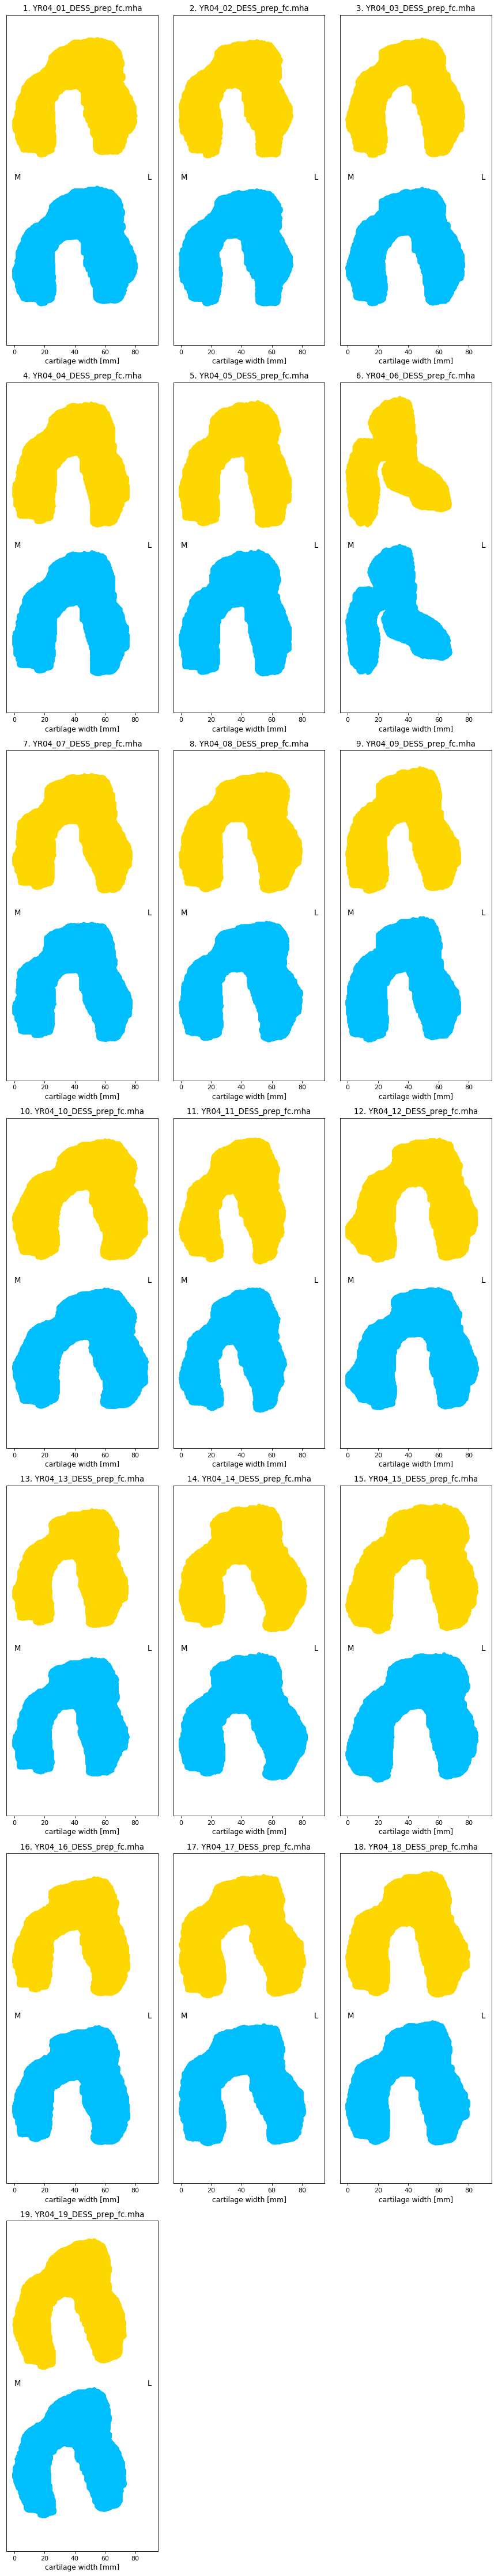

In [6]:
morph.show_cartilage_surfaces(imageData)

### Calculating cartilage thickness

Currently the algorithm available is # 1: Thickness is calculated as the distance of the points of the subcondral bone surface to the closest points of the articular surface  

In [7]:
morph.algorithm(imageData, 1)

Calculate thickness

In [8]:
morph.calculate_thickness(imageData, nOfCores)

YR04_03_DESS_prep_fc.mha
YR04_01_DESS_prep_fc.mha
YR04_05_DESS_prep_fc.mha
YR04_07_DESS_prep_fc.mha
YR04_06_DESS_prep_fc.mha
YR04_04_DESS_prep_fc.mha
YR04_08_DESS_prep_fc.mha
YR04_09_DESS_prep_fc.mha
YR04_02_DESS_prep_fc.mha
YR04_11_DESS_prep_fc.mha
YR04_13_DESS_prep_fc.mha
YR04_15_DESS_prep_fc.mha
YR04_10_DESS_prep_fc.mha
YR04_12_DESS_prep_fc.mha
YR04_14_DESS_prep_fc.mha
YR04_16_DESS_prep_fc.mha
YR04_17_DESS_prep_fc.mha
YR04_19_DESS_prep_fc.mha
YR04_18_DESS_prep_fc.mha
-> Thickness computed
-> The total time was 218.23 seconds (about 3 min)


### Visualizing cartilage thickness

Cartilage thickness is visualized as:
- a MAP: to observe spatial distribution
- a GRAPH: to observe the trend of average and standard deviation  
- a TABLE: to observe the numerical values of average and standard deviation

#### MAP: Thickness is a colormap on the flattened cartilage

YR04_01_DESS_prep_fc.mha
YR04_02_DESS_prep_fc.mha
YR04_03_DESS_prep_fc.mha
YR04_04_DESS_prep_fc.mha
YR04_05_DESS_prep_fc.mha
YR04_06_DESS_prep_fc.mha
YR04_07_DESS_prep_fc.mha
YR04_08_DESS_prep_fc.mha
YR04_09_DESS_prep_fc.mha
YR04_10_DESS_prep_fc.mha
YR04_11_DESS_prep_fc.mha
YR04_12_DESS_prep_fc.mha
YR04_13_DESS_prep_fc.mha
YR04_14_DESS_prep_fc.mha
YR04_15_DESS_prep_fc.mha
YR04_16_DESS_prep_fc.mha
YR04_17_DESS_prep_fc.mha
YR04_18_DESS_prep_fc.mha
YR04_19_DESS_prep_fc.mha


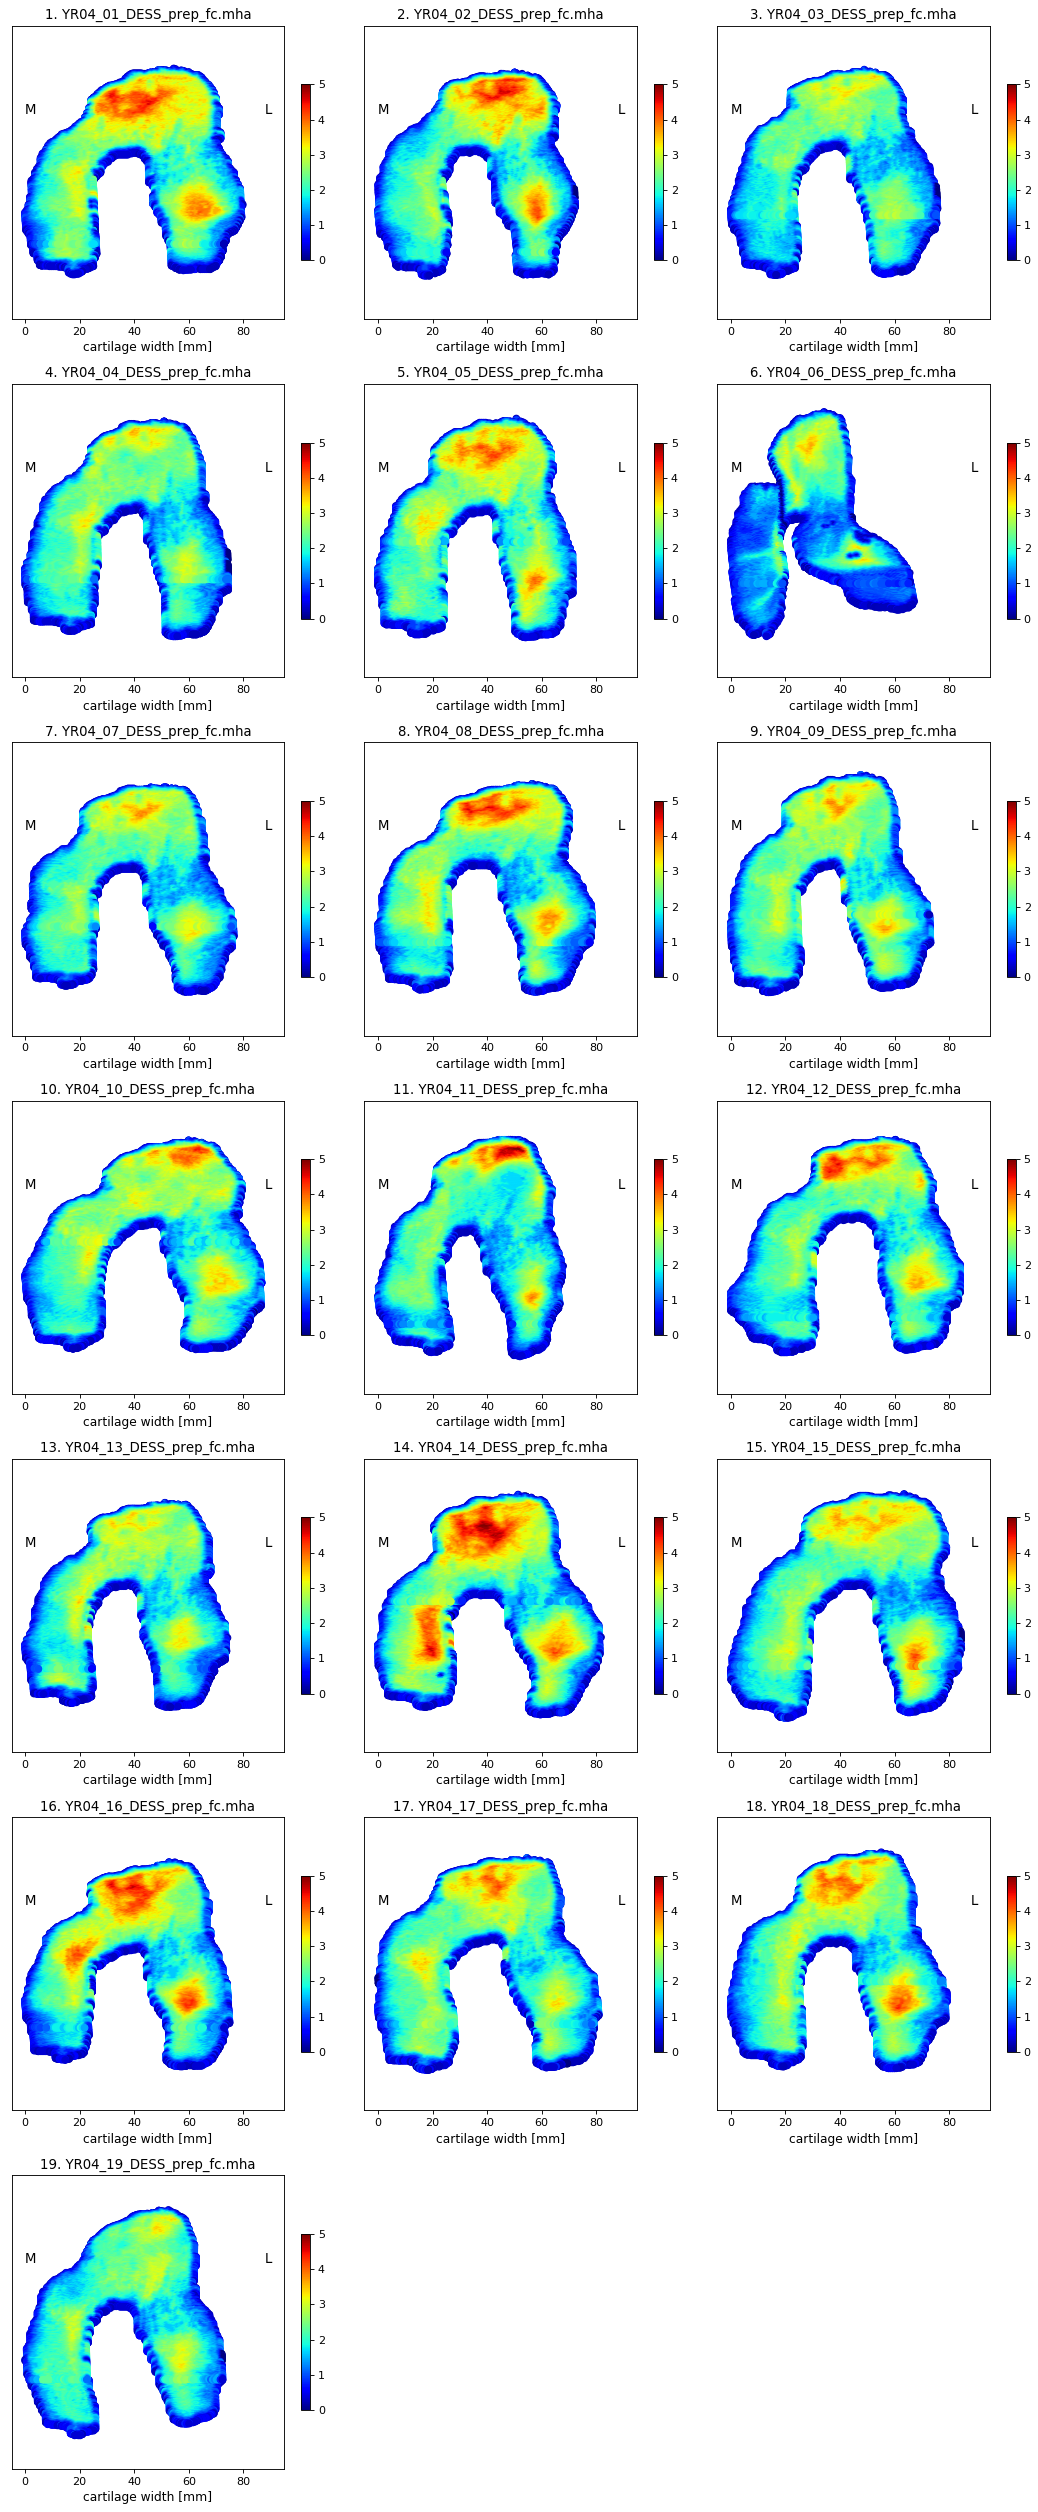

In [9]:
morph.show_thickness_maps(imageData)

#### GRAPH: Dots represent the average value of cartilage thickness per image; bars represents the standard deviation

<Figure size 720x576 with 0 Axes>

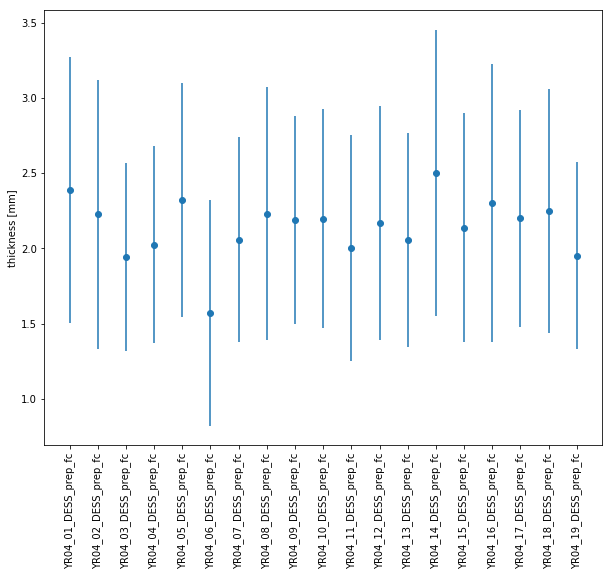

In [10]:
morph.show_thickness_graph(imageData)

#### TABLE: Average and standard deviation of cartilage thickness per image
The table is saved as a .csv file for subsequent analyisis

In [11]:
table = morph.show_thickness_table(imageData)
table

Table saved as: /Volumes/Sere's HD/work/data_pyKNEEr/OAI1/morphology/thicknesses.csv


,Subjects,averageThickness,std.dev
1,YR04_01_DESS_prep_fc_thickness_1,2.39,0.88
2,YR04_02_DESS_prep_fc_thickness_1,2.23,0.89
3,YR04_03_DESS_prep_fc_thickness_1,1.94,0.63
4,YR04_04_DESS_prep_fc_thickness_1,2.03,0.65
5,YR04_05_DESS_prep_fc_thickness_1,2.32,0.78
6,YR04_06_DESS_prep_fc_thickness_1,1.57,0.75
7,YR04_07_DESS_prep_fc_thickness_1,2.06,0.68
8,YR04_08_DESS_prep_fc_thickness_1,2.23,0.84
9,YR04_09_DESS_prep_fc_thickness_1,2.19,0.69
10,YR04_10_DESS_prep_fc_thickness_1,2.20,0.73


## Cartilage Volume

We calculate cartilage volume as the volume of the cartilage mask multiplied by the image resolution

In [12]:
morph.calculate_volume(imageData)

YR04_01_DESS_prep_fc.mha
YR04_02_DESS_prep_fc.mha
YR04_03_DESS_prep_fc.mha
YR04_04_DESS_prep_fc.mha
YR04_05_DESS_prep_fc.mha
YR04_06_DESS_prep_fc.mha
YR04_07_DESS_prep_fc.mha
YR04_08_DESS_prep_fc.mha
YR04_09_DESS_prep_fc.mha
YR04_10_DESS_prep_fc.mha
YR04_11_DESS_prep_fc.mha
YR04_12_DESS_prep_fc.mha
YR04_13_DESS_prep_fc.mha
YR04_14_DESS_prep_fc.mha
YR04_15_DESS_prep_fc.mha
YR04_16_DESS_prep_fc.mha
YR04_17_DESS_prep_fc.mha
YR04_18_DESS_prep_fc.mha
YR04_19_DESS_prep_fc.mha
-> Volume computed


#### GRAPH: Dots represent the average cartilage volume per image; bars represents the standard deviation

<Figure size 1296x576 with 0 Axes>

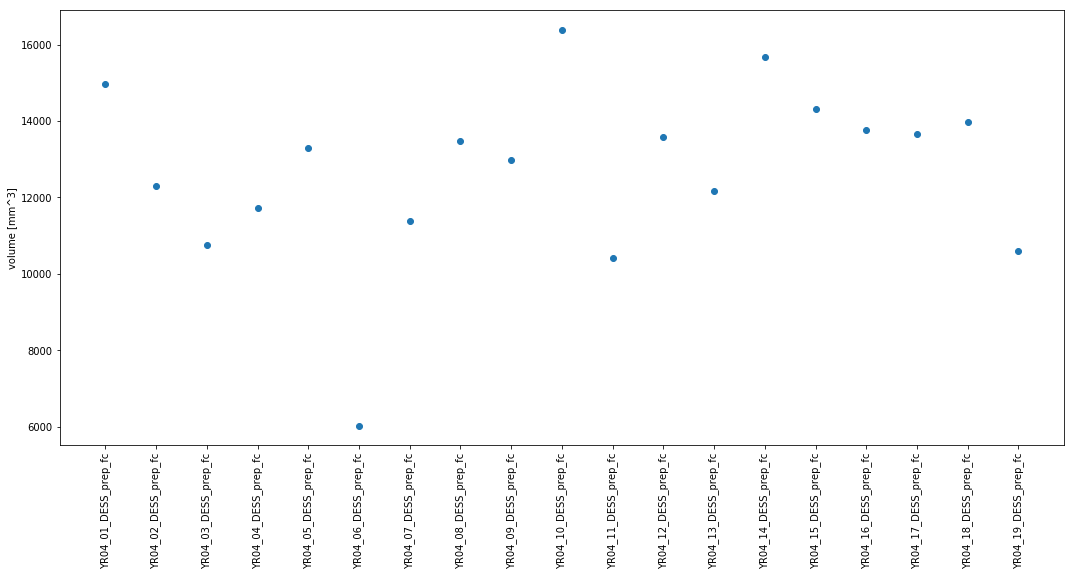

In [13]:
morph.show_volume_graph(imageData)

#### TABLE: Average and standard deviation of cartilage volume per image
The table is saved as a .csv file for subsequent analyisis

In [14]:
table = morph.show_volume_table(imageData)
table

Table saved as: /Volumes/Sere's HD/work/data_pyKNEEr/OAI1/morphology/volumes.csv


,Subjects,Volumes
1,YR04_01_DESS_prep_fc,14965
2,YR04_02_DESS_prep_fc,12295
3,YR04_03_DESS_prep_fc,10750
4,YR04_04_DESS_prep_fc,11723
5,YR04_05_DESS_prep_fc,13288
6,YR04_06_DESS_prep_fc,6032
7,YR04_07_DESS_prep_fc,11395
8,YR04_08_DESS_prep_fc,13490
9,YR04_09_DESS_prep_fc,12983
10,YR04_10_DESS_prep_fc,16378
